In [9]:
# Load Libraries
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score # CHECK WEEK 2-1 slides 15 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans 
from matplotlib import pyplot
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Import data
df = pd.read_excel(".xlsx")
pd.set_option('display.max_columns', None) # To force show all columns 
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,1.429989,8484.125686,Gadgets,False,8.0,8.0,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,1.114939,18454.471487,NaN,True,9.0,6.0,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45
2,839314928,PlantSitter - The World's Smartest Plant Monit...,60000.0,43234.0,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,2016-01-31 05:21:52,2016-02-18 08:01:08,False,632,1.000000,43234.000000,Gadgets,False,8.0,8.0,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39
3,681077916,Digital Video LUT Box for Colorblindness Corre...,125000.0,1262.0,canceled,False,US,USD,2016-03-19 07:48:02,2016-02-23 09:30:28,2016-01-28 11:21:14,2016-02-18 07:48:02,False,4,1.000000,1262.000000,Hardware,False,7.0,6.0,24.0,16.0,Saturday,Tuesday,Thursday,Thursday,3,19,2016,7,2,23,2016,9,1,28,2016,11,2,18,2016,7,20,30,5
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03 17:00:00,2016-03-03 17:00:00,2016-02-16 10:00:06,2016-02-18 07:00:44,False,29,1.000000,2300.000000,Experimental,True,6.0,5.0,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14


In [11]:
df.shape

(15474, 45)

In [17]:
df.isna().sum()

id                             0
name                           0
goal                           0
pledged                        0
state                          0
disable_communication          0
country                        0
currency                       0
deadline                       0
state_changed_at               0
created_at                     0
launched_at                    0
staff_pick                     0
backers_count                  0
static_usd_rate                0
usd_pledged                    0
spotlight                      0
name_len                       0
name_len_clean                 0
blurb_len                      0
blurb_len_clean                0
deadline_weekday               0
state_changed_at_weekday       0
created_at_weekday             0
launched_at_weekday            0
deadline_month                 0
deadline_day                   0
deadline_yr                    0
deadline_hr                    0
state_changed_at_month         0
state_chan

In [16]:
df = df.dropna() 

# Data Pre-Processing

In [14]:
# Identifying missing observations 
# Missing 1,392 observations exist only in the category variable
# 1 Missing observation in the name variable 
# 4 of the name_len, name_len_clean, blurb_len, and blurb_len_clean of each are missing 

# Approach 1 
# Approach 1) Replace category missing values with the most frequently occuring value in the column 
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category = DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
# Call function 
for Columns in ['category']:
    impute_nan_most_frequent_category(df,Columns)
    
# Display imputed result
df[['category','category_Imputed']].head(10)
# Drop the category column with this imputed ones
df.drop(labels = ['category'], axis = 1, inplace = True)
# renaming it back to category 
df.rename(columns = {'category_Imputed':'category'}, inplace = True)







<AxesSubplot:>

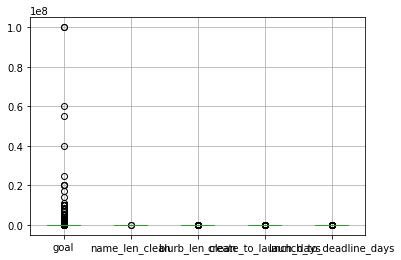

In [18]:
# Drop missing values 
df = df.dropna() 

# Drop variables who has the value constant throughout = NONE

# Only keep "successful" and "failed" observations in 'state' variable 
df['state'].value_counts() 
df = df[ df['state'] != 'canceled' ]
df = df[ df['state'] != 'suspended' ]

# Drop irrelevant variables 
df.drop(labels = ['id', 'name'], axis = 1, inplace = True)

# Checked to see if any categorical variable had a lot of categories in. But none had any therefore, there was no 
# no need to reclassify any categorical variables chosen. Ex: shown for country variable. 
df['country'].value_counts()
# It only contained 18 < 50, so no need for reclassification

# The model should only use the predictors that are available at the moment when a new project is launched
# The variable static_usd_rate will be dropped since it's relating to the variable pledged and usd_pledged 
df.drop(labels = ['pledged', 'currency', 'state_changed_at', 'static_usd_rate','staff_pick', 'backers_count', 
                           'usd_pledged', 'spotlight','state_changed_at_weekday', 'state_changed_at_month', 
                           'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 
                           'launch_to_state_change_days'], axis = 1, inplace = True)


# Drop any variables with data since we already have other variables capturing the month, day, and hr 
df.drop(labels = ['deadline', 'created_at', 'launched_at'], axis = 1, inplace = True)


# Dummify Categorical variables (Transform Categorical Variables to Numerical Indicators or values)
df = pd.get_dummies(columns = ['disable_communication', 'country', 'category',
                               'deadline_weekday', 'created_at_weekday', 
                               'launched_at_weekday'], drop_first = True, data = df)
# compared country and currency but country gave a better performance so I dropped currency

# Target variable "state" is already a categorical variable, but need to transform it to numerical value 
df = pd.get_dummies(df, columns = ['state'], drop_first = True) # column is "state_successful"


# Correlation
correlation_matrix = df.corr()
df.drop(columns = ['name_len', 'blurb_len'], axis = 1, inplace = True)
# name_len and blurb_len have high positive correlation >0.70 with name_len_clean and blurb_len_clean

# Outliers 
numeric_col = ['goal','name_len_clean','blurb_len_clean', 'create_to_launch_days', 'launch_to_deadline_days']
df.boxplot(numeric_col)

#  Script for Removing outliers 
# for x in ['goal']:
#     q75,q25 = np.percentile(df.loc[:,x],[75,25])
#     intr_qr = q75-q25
 
#     max = q75+(1.5*intr_qr)
#     min = q25-(1.5*intr_qr)
 
#     df.loc[df[x] < min,x] = np.nan
#     df.loc[df[x] > max,x] = np.nan

# Data Initializing

In [19]:
X = df.drop(columns = ["state_successful"]) # all except the target variable
y = df["state_successful"]

In [20]:
df.head(20)

,goal,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_SE,country_US,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,deadline_weekday_Monday,deadline_weekday_Saturday,deadline_weekday_Sunday,deadline_weekday_Thursday,deadline_weekday_Tuesday,deadline_weekday_Wednesday,created_at_weekday_Monday,created_at_weekday_Saturday,created_at_weekday_Sunday,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday,state_successful
0,15000.0,8.0,14.0,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9000.0,6.0,15.0,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2000.0,5.0,13.0,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,3000.0,4.0,14.0,4,18,2016,4,1,27,2016,17,2,18,2016,4,21,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
6,35000.0,2.0,15.0,3,25,2016,21,1,24,2016,23,2,17,2016,21,23,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,2000.0,9.0,12.0,3,18,2016,21,2,16,2016,8,2,17,2016,21,1,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
8,6000.0,7.0,18.0,4,17,2016,18,2,16,2016,14,2,17,2016,18,1,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
9,80000.0,3.0,13.0,3,18,2016,18,2,14,2016,23,2,17,2016,18,2,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,105000.0,7.0,17.0,4,2,2016,17,1,28,2016,22,2,17,2016,17,19,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
12,80000.0,2.0,13.0,3,3,2016,15,2,17,2016,14,2,17,2016,15,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# Gradient Boosting Algorithm

In [21]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 600)
# higher random state for reproducibility purposes
# To make the predictions about the projects consistent throughout various projects

In [22]:
gbt = GradientBoostingClassifier(random_state = 0)

tuning_params =  {
    "n_estimators": [100, 150], 
    "learning_rate": [0.025, 0.05, 0.075, 0.1], # to test various contribution of each tree 
    "min_samples_split": [5, 10, 15, 20], # to prevent overfitting
    "max_depth":[3,5,8,10], # for amount of layer selection
    "max_features":["log2","sqrt"] } # to define the max number of predictors required to split each node

grid_search = GridSearchCV(estimator = gbt, 
                           param_grid = tuning_params, 
                           scoring = 'accuracy', n_jobs = -1, cv = 5) # this shows the number of folds! 

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.025, 0.05, 0.075, 0.1],
                         'max_depth': [3, 5, 8, 10],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [23]:
scores = pd.DataFrame(grid_search.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.328260,0.019620,0.005284,0.001557,0.025,3,log2,5,100,"{'learning_rate': 0.025, 'max_depth': 3, 'max_...",0.689444,0.692222,0.683333,0.693333,0.686667,0.689000,0.003658,255
1,0.432976,0.021485,0.006037,0.001830,0.025,3,log2,5,150,"{'learning_rate': 0.025, 'max_depth': 3, 'max_...",0.717222,0.716111,0.698333,0.723889,0.708889,0.712889,0.008695,245
2,0.284036,0.033054,0.004030,0.000124,0.025,3,log2,10,100,"{'learning_rate': 0.025, 'max_depth': 3, 'max_...",0.690000,0.691667,0.684444,0.693889,0.686111,0.689222,0.003489,253
3,0.406907,0.009673,0.009026,0.003240,0.025,3,log2,10,150,"{'learning_rate': 0.025, 'max_depth': 3, 'max_...",0.715556,0.717778,0.696667,0.725000,0.708889,0.712778,0.009558,246
4,0.283165,0.042215,0.004110,0.000290,0.025,3,log2,15,100,"{'learning_rate': 0.025, 'max_depth': 3, 'max_...",0.691111,0.692222,0.683889,0.692222,0.686667,0.689222,0.003363,253


In [24]:
grid_search.best_score_

0.7477777777777778

In [25]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 150}

Accuracy score = 0.7437979251240415
Precision score = 0.6458832933653078
Recall score = 0.5383077948034644
F1 score = 0.5872093023255814


        pred:0  pred:1
true:0    2490     443
true:1     693     808


<AxesSubplot:>

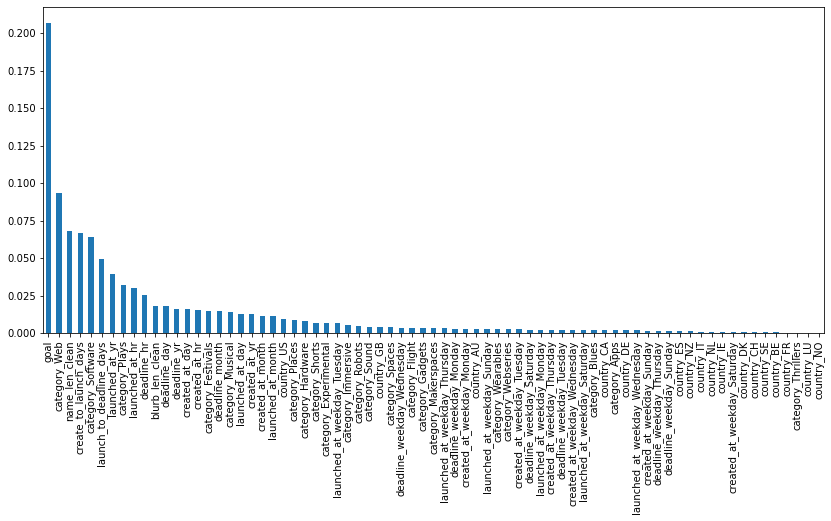

In [27]:
gbt = GradientBoostingClassifier(random_state = 0, n_estimators = 150, learning_rate = 0.1, max_depth = 5, 
                                 max_features = 'sqrt', min_samples_split = 5)


model_gbt = gbt.fit(X_train, y_train) 

# Make predictions
y_test_pred = model_gbt.predict(X_test)

# Check Scores 
print('Accuracy score =', metrics.accuracy_score(y_test, y_test_pred))

print('Precision score =', metrics.precision_score(y_test, y_test_pred))

print('Recall score =', metrics.recall_score(y_test, y_test_pred))

print('F1 score =', metrics.f1_score(y_test, y_test_pred))

print('\n')

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred, labels=[0,1]),
                   index=['true:0', 'true:1'], columns=['pred:0', 'pred:1']))

# plot the feature importance 
pd.Series(model_gbt.feature_importances_, index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

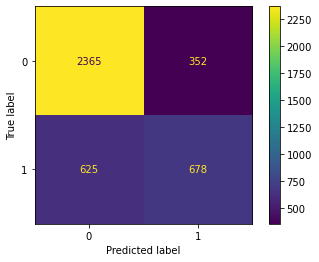

In [261]:
# Plot the confusion matrix 
cm = confusion_matrix(y_test, y_test_pred, labels=gbt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbt.classes_)
disp.plot()

plt.show()

## Grading ##

In [241]:
# Import Grading Data
kickstarter_grading_df = pd.read_excel("")

# Pre-Process Grading Data
kickstarter_grading_df = kickstarter_grading_df.dropna()

# Only keep "successful" and "failed" observations in 'state' variable 
kickstarter_grading_df = kickstarter_grading_df[ kickstarter_grading_df['state'] != 'canceled' ]
kickstarter_grading_df = kickstarter_grading_df[ kickstarter_grading_df['state'] != 'suspended' ]

# Drop irrelevant variables 
kickstarter_grading_df.drop(labels = ['id', 'name'], axis = 1, inplace = True)


# The model should only use the predictors that are available at the moment when a new project is launched
# The variable static_usd_rate will be dropped since it's relating to the variable pledged and usd_pledged 
kickstarter_grading_df.drop(labels = ['pledged', 'currency', 'state_changed_at', 'static_usd_rate','staff_pick', 
                                      'backers_count', 'usd_pledged', 'spotlight','state_changed_at_weekday', 
                                      'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 
                                      'state_changed_at_hr', 'launch_to_state_change_days'],axis = 1,inplace = True)


# Drop the "data" variables since we already have other variables capturing the month, day, and hr 
kickstarter_grading_df.drop(labels = ['deadline', 'created_at', 'launched_at'], axis = 1, inplace = True)


# Dummify Categorical variables (Transform Categorical Variables to Numerical Indicators or values)
kickstarter_grading_df = pd.get_dummies(columns = ['disable_communication', 'country', 'category',
                                                   'deadline_weekday', 'created_at_weekday',
                                                   'launched_at_weekday'], drop_first = True, data = kickstarter_grading_df)

# Target variable "state" is already a categorical variable, but need to transform it to numerical value 
kickstarter_grading_df = pd.get_dummies(kickstarter_grading_df, columns = ['state'], drop_first = True) 
# ^ column is "state_successful"

# Correlation
kickstarter_grading_df.drop(columns = ['name_len', 'blurb_len'], axis = 1, inplace = True)


# Setup the variables
X_grading = kickstarter_grading_df.drop(columns = ["state_successful"]) # all except the target variable
y_grading = kickstarter_grading_df["state_successful"]

# Apply the model previously trained to the grading data
y_grading_pred = model_gbt.predict(X_grading)

# Calculate the accuracy score
accuracy_score(y_grading, y_grading_pred)

/Users/mohamaddalati/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- country_LU

  warnings.warn(message, FutureWarning)


ValueError: X has 72 features, but GradientBoostingClassifier is expecting 73 features as input.

In [244]:
kickstarter_grading_df

,goal,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_IE,country_IT,country_NL,country_NO,country_NZ,country_SE,country_US,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,deadline_weekday_Monday,deadline_weekday_Saturday,deadline_weekday_Sunday,deadline_weekday_Thursday,deadline_weekday_Tuesday,deadline_weekday_Wednesday,created_at_weekday_Monday,created_at_weekday_Saturday,created_at_weekday_Sunday,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday,state_successful
0,10000,4,17,7,21,2016,17,12,27,2015,21,6,21,2016,17,176,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1000,2,17,7,21,2016,15,6,1,2016,5,6,21,2016,15,20,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,500000,7,12,7,21,2016,12,12,8,2015,12,6,21,2016,12,196,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,25000,2,6,7,21,2016,11,2,25,2016,21,6,21,2016,11,116,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,25000,1,10,7,21,2016,11,6,20,2016,17,6,21,2016,11,0,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,40000,6,14,3,19,2016,13,1,24,2016,18,2,18,2016,13,24,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1996,800,5,17,4,3,2016,13,2,16,2016,11,2,18,2016,13,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1997,15000,3,14,3,19,2016,11,2,3,2016,6,2,18,2016,11,15,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1998,9000,2,11,3,19,2016,10,2,17,2016,10,2,18,2016,10,0,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [243]:
df

,goal,name_len_clean,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_SE,country_US,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,deadline_weekday_Monday,deadline_weekday_Saturday,deadline_weekday_Sunday,deadline_weekday_Thursday,deadline_weekday_Tuesday,deadline_weekday_Wednesday,created_at_weekday_Monday,created_at_weekday_Saturday,created_at_weekday_Sunday,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday,state_successful
0,15000.0,8.0,14.0,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2000.0,5.0,13.0,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
5,3000.0,4.0,14.0,4,18,2016,4,1,27,2016,17,2,18,2016,4,21,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
6,35000.0,2.0,15.0,3,25,2016,21,1,24,2016,23,2,17,2016,21,23,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,2000.0,9.0,12.0,3,18,2016,21,2,16,2016,8,2,17,2016,21,1,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.0,4.0,4.0,7,14,2009,15,5,15,2009,15,5,15,2009,17,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15469,2500.0,1.0,15.0,7,14,2009,10,5,12,2009,10,5,12,2009,14,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
15470,250.0,5.0,15.0,6,1,2009,11,5,7,2009,14,5,7,2009,17,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
15472,500.0,3.0,15.0,6,15,2009,14,4,29,2009,14,4,29,2009,16,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


# Clustering 


In [42]:
# Import data
df = pd.read_excel(".xlsx")
pd.set_option('display.max_columns', None) # To force show all columns 

In [43]:
## Data Pre-processing
# Only keep "successful" and "failed" classes in 'state' variable 
df = df[ df['state'] != 'canceled' ]
df = df[ df['state'] != 'suspended' ]

# Drop missing values 
df.dropna(inplace = True) 

# Target variable "state" is a categorical variable, so we need to transform it to a numerical value 
df = pd.get_dummies(df, columns = ['state'], drop_first = True) # column is "state_successful"

In [44]:
#Drop unnecessary columns or labels
df_updated = df [ ['state_successful', 'goal', 'pledged', 'launch_to_deadline_days', 'category', 'launched_at_month'] ]
df_updated
df = df_updated

In [45]:
df.isna().sum()

state_successful           0
goal                       0
pledged                    0
launch_to_deadline_days    0
category                   0
launched_at_month          0
dtype: int64

In [48]:
df

,state_successful,goal,pledged,launch_to_deadline_days,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,launched_at_month_2,launched_at_month_3,launched_at_month_4,launched_at_month_5,launched_at_month_6,launched_at_month_7,launched_at_month_8,launched_at_month_9,launched_at_month_10,launched_at_month_11,launched_at_month_12
0,0,15000.0,5933.0,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,2000.0,2300.0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,3000.0,3255.0,60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,35000.0,823.0,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,2000.0,62831.0,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,0,1200.0,595.0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15469,0,2500.0,0.0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15470,0,250.0,6.0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15472,1,500.0,1820.0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [47]:
# Dummify variables
df = pd.get_dummies(data = df, columns = ['category'], drop_first = True)
df = pd.get_dummies(data = df, columns = ['launched_at_month'], drop_first = True)

In [49]:
X = df

# Standardize 
# Better to use Min-Max to reduce the variance 
# Min-MaxScaler for Min-Max Standardization 
Mscaler = MinMaxScaler()
X_std = Mscaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

## Elbow Method (evaluates within variation only)

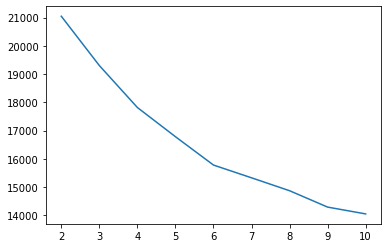

In [50]:
### Finding optimal K using elbow method
from sklearn.cluster import KMeans
withinss = [] 
for i in range (2,11):   # testing K from 2 to 10  
    kmeans = KMeans(n_clusters = i)
    model = kmeans.fit(X_std)
    withinss.append(model.inertia_)
# the value here is the value of inertia (not much to interpret, go to plot)
from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7,8,9,10], withinss)
# 4 is the optimal k cluster 

## Silhoutte Score (Evaluates within and between cluster variations)

In [51]:
from sklearn.metrics import silhouette_score
for i in range (2,11):    
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X_std)
    labels = model.labels_
    print(i,':',silhouette_score(X_std,labels))
# I will choose 6 clusters 

2 : 0.13471746870813428
3 : 0.1259191862453069
4 : 0.1540749759473047
5 : 0.18509021716181226
6 : 0.18292477260173803
7 : 0.19408403324833007
8 : 0.1997041936789241
9 : 0.2167443495762568
10 : 0.19436650519254553


## F-statistics is not reliable because since we have large dataset

## Running K-Means with k = 6

In [52]:
kmeans = KMeans(n_clusters = 6)
model = kmeans.fit(X_std)
labels = model.labels_
clusters = pd.DataFrame(model.cluster_centers_, columns= X.columns)
clusters

,state_successful,goal,pledged,launch_to_deadline_days,category_Apps,category_Blues,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,category_Musical,category_Places,category_Plays,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries,launched_at_month_2,launched_at_month_3,launched_at_month_4,launched_at_month_5,launched_at_month_6,launched_at_month_7,launched_at_month_8,launched_at_month_9,launched_at_month_10,launched_at_month_11,launched_at_month_12
0,1.587561e-01,0.000974,0.000666,0.387125,-3.191891e-16,9.757820e-19,7.632783e-17,-5.551115e-17,4.163336e-17,-2.498002e-16,5.551115e-17,-2.949030e-17,5.204170e-18,4.163336e-17,1.474515e-17,-9.714451e-17,1.040834e-17,-3.903128e-18,1.000000e+00,2.775558e-17,2.602085e-17,1.084202e-18,2.359224e-16,3.608225e-16,8.239937e-18,0.083470,0.072013,0.068740,0.090562,0.078560,0.102019,0.084015,0.085652,0.088380,0.089471,0.075832
1,1.000000e+00,0.000139,0.005396,0.335845,1.032886e-01,4.631774e-03,6.160259e-02,9.541454e-02,2.686429e-02,-4.024558e-16,-2.220446e-16,4.863363e-02,2.547476e-02,1.417323e-01,-6.071532e-18,2.320519e-01,6.669755e-02,1.760074e-02,-5.273559e-16,5.836035e-02,2.732747e-02,1.951564e-18,9.031959e-02,3.330669e-16,8.673617e-18,0.072256,0.064382,0.070866,0.115331,0.109773,0.100973,0.086151,0.081982,0.084298,0.076424,0.057897
2,3.945462e-01,0.001066,0.007147,0.379118,-5.551115e-17,-2.059984e-18,1.561251e-16,-1.179612e-16,3.469447e-17,-1.387779e-16,1.000000e+00,7.806256e-17,3.642919e-17,-2.220446e-16,5.637851e-17,-4.440892e-16,3.469447e-17,-2.211772e-17,8.326673e-16,-3.469447e-17,2.602085e-17,-3.035766e-18,2.844947e-16,3.608225e-16,8.890458e-18,0.081380,0.085215,0.090754,0.083937,0.082659,0.082659,0.075415,0.078824,0.093311,0.089902,0.077972
3,1.054712e-15,0.000973,0.000376,0.374516,2.119232e-01,6.505213e-19,3.797468e-02,4.899959e-02,7.717436e-02,-5.689893e-16,-5.828671e-16,3.470804e-02,2.939976e-02,9.881584e-02,3.429971e-02,1.331156e-01,6.859943e-02,-3.469447e-18,-5.828671e-16,5.716619e-02,2.327481e-02,5.308289e-03,1.257656e-01,3.608225e-16,7.349939e-03,0.084116,0.060433,0.072683,0.077174,0.093916,0.123316,0.100857,0.074724,0.087791,0.084524,0.060841
4,8.426443e-02,0.001278,0.000670,0.380043,-4.649059e-16,8.673617e-19,1.457168e-16,-1.387779e-16,3.816392e-17,-5.273559e-16,-4.718448e-16,-2.775558e-17,-7.112366e-17,2.012279e-16,1.908196e-17,-3.191891e-16,-8.673617e-17,1.301043e-18,-5.828671e-16,-4.163336e-17,2.602085e-17,-8.673617e-19,2.775558e-16,1.000000e+00,9.107298e-18,0.087989,0.065642,0.062849,0.063315,0.075419,0.121974,0.099628,0.093110,0.094041,0.091248,0.064246
5,3.255627e-01,0.000613,0.005401,0.386692,-2.081668e-16,7.589415e-19,6.938894e-18,-1.387779e-17,3.469447e-17,1.000000e+00,3.608225e-16,-2.428613e-17,0.000000e+00,1.387779e-16,-1.040834e-17,1.665335e-16,-3.122502e-17,6.071532e-18,-4.440892e-16,6.245005e-17,2.255141e-17,3.686287e-18,1.873501e-16,3.053113e-16,6.505213e-18,0.065113,0.057074,0.067524,0.070740,0.076367,0.086013,0.099678,0.118167,0.097267,0.118167,0.073151


In [53]:
from sklearn.metrics import silhouette_samples
silhouette = silhouette_samples(X_std, labels)
display(silhouette) # most variables scored > 0.5, meaning they got clustered correctly 

array([0.26292602, 0.08786091, 0.13396388, ..., 0.31047488, 0.17336869,
       0.16546566])

In [222]:
pd.set_option('display.max_columns', None) # To force show all columns 
pd.set_option('display.max_rows', 100) # To force show all rows 
Results = pd.DataFrame({"Columns": X_std.columns, "Cluster 1": model.cluster_centers_[0], "Cluster 2": model.cluster_centers_[1],
             "Cluster 3": model.cluster_centers_[2], "Cluster 4": model.cluster_centers_[3],
                      "Cluster 5": model.cluster_centers_[4], "Cluster 6": model.cluster_centers_[5]})